## Exercise-7
Wenfeng Zhu-Computer Vision and Deep Learning: Visual Synthesis

Import some necessary libraries:

In [2]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision.transforms as transforms
import torch.nn.functional as F
from tqdm import tqdm
import torch.optim as optim
import matplotlib.pyplot as plt

### Task 1: Deriving the Analytical Solution for the KL Divergence

Original equation:
$$
D_{KL}(q_\phi(z|x^{(i)}) || p_\theta(z))
$$
And we have set:
$$
q_\phi(z|x^{(i)}) \sim \mathcal{N}(z;\mu;\Sigma)\\
p_\theta(z) \sim \mathcal{N}(z;\vec{0};I)
$$
KL divergence between two multivariate Gaussians with dimension n is given by:
$$
D_{KL} (\mathcal{N}(z;\mu_1;\Sigma_1) || \mathcal{N}(z;\mu_2;\Sigma_2))\\
= \frac{1}{2}[log \frac{|\Sigma_2|}{|\Sigma_1|}-n+Tr(\Sigma_2^{-1}\Sigma_1)+(\mu_2-\mu_1)^T\Sigma_2^{-1}(\mu_2-\mu_1)]
$$
Because the $\mathtt{I}$ i.e. $\Sigma_2$ is the identity matrix,then $\mu_2 = \vec{0}$:
$$
log \frac{|\Sigma_2|}{|\Sigma_1|} = -log\sum_{i=n}^n \sigma_i^2\\
Tr(\Sigma_2^{-1}\Sigma_1) = \sum_{i=n}^n \sigma_i^2\\
(\mu_2-\mu_1)^T\Sigma_2^{-1}(\mu_2-\mu_1) = \mu_1^2
$$
Above summary, we can get:
$$
D_{KL}(q_\phi(z|x^{(i)}) || p_\theta(z)) = \frac{1}{2}[\sum_{i=n}^n \sigma_i^2+\sum_{i=n}^n \mu_i^2-\sum_{i=n}^n(log\sigma_i^2+1)]
$$

### Task 2: Training a Variational Autoencoder on MNIST

Batch:  22%|██▏       | 105/469 [00:02<00:07, 51.93it/s]


Epoch[1/5], Step [100/469], Reconst Loss: 0.0709, KL Div: 0.4096


Batch:  44%|████▍     | 207/469 [00:04<00:05, 51.95it/s]


Epoch[1/5], Step [200/469], Reconst Loss: 0.0622, KL Div: 0.0217


Batch:  66%|██████▌   | 309/469 [00:06<00:03, 51.22it/s]


Epoch[1/5], Step [300/469], Reconst Loss: 0.0623, KL Div: 0.0890


Batch:  86%|████████▋ | 405/469 [00:07<00:01, 51.35it/s]


Epoch[1/5], Step [400/469], Reconst Loss: 0.0567, KL Div: 0.0947


Batch: 100%|██████████| 469/469 [00:09<00:00, 51.48it/s]


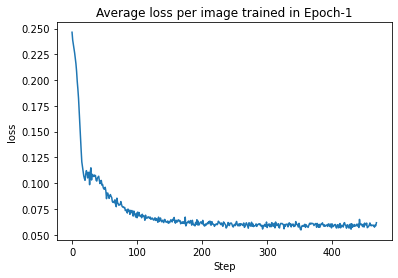

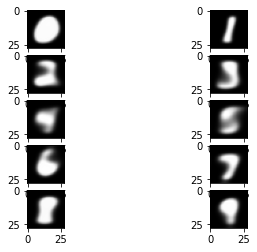

Batch:  22%|██▏       | 105/469 [00:02<00:07, 50.97it/s]


Epoch[2/5], Step [100/469], Reconst Loss: 0.0575, KL Div: 0.0607


Batch:  44%|████▍     | 207/469 [00:04<00:05, 48.14it/s]


Epoch[2/5], Step [200/469], Reconst Loss: 0.0570, KL Div: 0.0548


Batch:  66%|██████▌   | 309/469 [00:06<00:03, 50.39it/s]


Epoch[2/5], Step [300/469], Reconst Loss: 0.0562, KL Div: 0.1199


Batch:  87%|████████▋ | 408/469 [00:08<00:01, 50.36it/s]


Epoch[2/5], Step [400/469], Reconst Loss: 0.0580, KL Div: 0.0449


Batch: 100%|██████████| 469/469 [00:09<00:00, 50.56it/s]


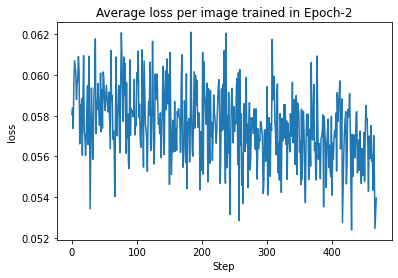

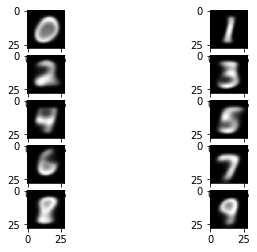

Batch:  23%|██▎       | 108/469 [00:02<00:07, 50.60it/s]


Epoch[3/5], Step [100/469], Reconst Loss: 0.0526, KL Div: 0.1151


Batch:  44%|████▍     | 208/469 [00:04<00:05, 50.49it/s]


Epoch[3/5], Step [200/469], Reconst Loss: 0.0544, KL Div: 0.2438


Batch:  66%|██████▌   | 310/469 [00:06<00:03, 49.99it/s]


Epoch[3/5], Step [300/469], Reconst Loss: 0.0535, KL Div: 0.2147


Batch:  87%|████████▋ | 406/469 [00:08<00:01, 50.66it/s]


Epoch[3/5], Step [400/469], Reconst Loss: 0.0527, KL Div: 0.5443


Batch: 100%|██████████| 469/469 [00:09<00:00, 50.09it/s]


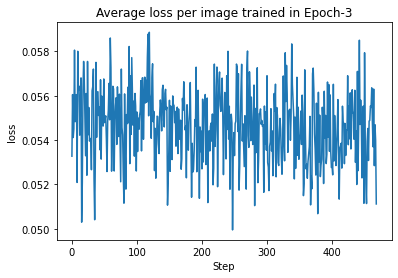

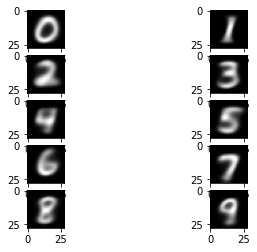

Batch:  22%|██▏       | 105/469 [00:02<00:07, 51.38it/s]


Epoch[4/5], Step [100/469], Reconst Loss: 0.0552, KL Div: 1.0505


Batch:  44%|████▍     | 207/469 [00:04<00:05, 51.84it/s]


Epoch[4/5], Step [200/469], Reconst Loss: 0.0547, KL Div: 0.9454


Batch:  66%|██████▌   | 309/469 [00:06<00:03, 50.45it/s]


Epoch[4/5], Step [300/469], Reconst Loss: 0.0547, KL Div: 0.9019


Batch:  86%|████████▌ | 404/469 [00:07<00:01, 51.81it/s]


Epoch[4/5], Step [400/469], Reconst Loss: 0.0541, KL Div: 0.8409


Batch: 100%|██████████| 469/469 [00:09<00:00, 51.02it/s]


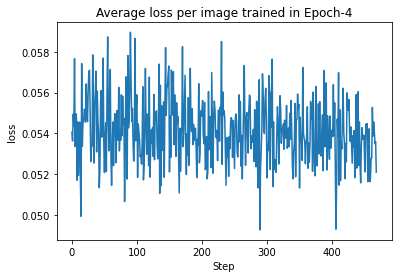

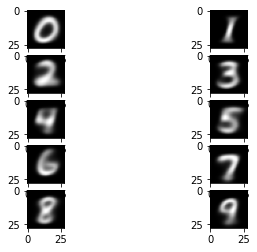

Batch:  23%|██▎       | 110/469 [00:02<00:06, 51.52it/s]


Epoch[5/5], Step [100/469], Reconst Loss: 0.0543, KL Div: 2.5196


Batch:  44%|████▍     | 206/469 [00:04<00:05, 50.34it/s]


Epoch[5/5], Step [200/469], Reconst Loss: 0.0539, KL Div: 1.7505


Batch:  65%|██████▌   | 306/469 [00:06<00:03, 49.77it/s]


Epoch[5/5], Step [300/469], Reconst Loss: 0.0525, KL Div: 1.7463


Batch:  87%|████████▋ | 410/469 [00:08<00:01, 48.61it/s]


Epoch[5/5], Step [400/469], Reconst Loss: 0.0541, KL Div: 2.4534


Batch: 100%|██████████| 469/469 [00:09<00:00, 49.66it/s]


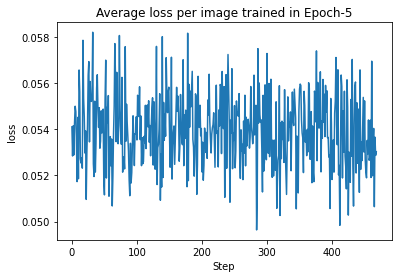

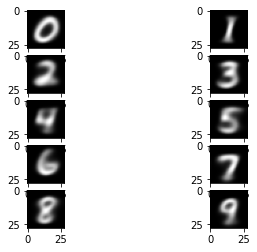

In [13]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


class VAE(nn.Module):

    def __init__(self, num_channels=1, num_classes=10, latent_dim=2, embed_dim=16):
        super(VAE, self).__init__()

        self.latent_dim = latent_dim
        self.embedding = nn.Embedding(num_embeddings=num_classes, embedding_dim=embed_dim)

        self.encoder = nn.ModuleList([
            nn.Conv2d(in_channels=num_channels, out_channels=8, kernel_size=3, stride=2, padding=1),
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=2, padding=1),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=2, padding=1),
        ])

        self.decoder = nn.ModuleList([
            nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3, padding=1),
            nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3),
            nn.Conv2d(in_channels=8, out_channels=num_channels, kernel_size=3, padding=1),
        ])
        self.fc_latent = nn.Linear(in_features=latent_dim + embed_dim, out_features=512)

        self.fc_mean = nn.Linear(in_features=512 + embed_dim, out_features=latent_dim)
        self.fc_var = nn.Linear(in_features=512 + embed_dim, out_features=latent_dim)
        self.leaky_relu = nn.LeakyReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x, y):
        """
        Args:
            x (tensor): Image(s) of shape [B, C, H, W].
            y (tensor): Class label(s) of shape [B,].

        Returns:
            x_recon (tensor): Reconstructed image(s) of shape [B, C, H, W].
            mean (tensor): Mean of shape [B, latent_dim].
            log_var (tensor): Log variance of shape [B, latent_dim].
        """
        mean, log_var = self.encode(x, y)
        # Reparameterization Trick
        eps = torch.randn(log_var.shape, device=log_var.device)
        z = mean + torch.exp(log_var * 0.5) * eps
        x_recon = self.decode(z, y)
        return x_recon, mean, log_var

    def encode(self, x, y):
        """
        Args:
            x (tensor): Image(s) of shape [B, C, H, W].
            y (tensor): Class label(s) of shape [B,].

        Returns:
            mean (tensor): Mean of shape [B, latent_dim].
            log_var (tensor): Log variance of shape [B, latent_dim].
        """
        for layer in self.encoder:
            x = layer(x)
            x = self.leaky_relu(x)
        x = torch.reshape(x, (x.shape[0], -1))
        class_embed = self.embedding(y)
        # Concat class information
        mean = self.fc_mean(torch.cat((x, class_embed), dim=1))
        log_var = self.fc_var(torch.cat((x, class_embed), dim=1))
        return mean, log_var

    def decode(self, z, y):
        """
        Args:
            z (tensor): Latent variable(s) of shape [B, latent_dim].
            y (tensor): Class label(s) of shape [B,].

        Returns:
            x (tensor): Reconstructed image(s) of shape [B, C, H, W].
        """
        class_embed = self.embedding(y)
        # Concat class information
        x = self.fc_latent(torch.cat((z, class_embed), dim=1))
        x = torch.reshape(x, (-1, 32, 4, 4))
        for layer in self.decoder:
            x = nn.functional.interpolate(x, scale_factor=2, mode='bilinear', align_corners=True)
            x = self.leaky_relu(x)
            x = layer(x)
        x = self.sigmoid(x)
        return x

    def sample(self, y, device):
        """
        Args:
            y (int): Class label.
            device (torch.device): Which device to use (cuda or cpu).

        Returns:
            (tensor): Image of shape [1, C, H, W].
        """
        z = torch.randn((1, self.latent_dim), device=device)
        return self.decode(z, torch.tensor([y], device=device))

    def sample_latent(self, x, y):
        """
        Args:
            x (tensor): Image(s) of shape [B, C, H, W].
            y (tensor): Class label(s) of shape [B,].

        Returns:
            z (tensor): Latent variable(s) of shape [B, latent_dim].
        """
        mean, log_var = self.encode(x, y)
        # Reparameterization Trick
        eps = torch.randn(log_var.shape, device=log_var.device)
        z = mean + torch.exp(log_var * 0.5) * eps
        return z


def data_loader():
    TrainData = datasets.MNIST(root="../data", train=True, download=True, transform=transforms.ToTensor())
    # TestData = datasets.MNIST(root="../data", train=False, download=True, transform=transforms.ToTensor())
    train_dataloader = DataLoader(TrainData, batch_size=128, shuffle=True)
    # test_dataloader = DataLoader(TestData, batch_size=128, shuffle=False)
    return train_dataloader



def model_training(n_epoch, dataloader):
    vae = VAE().to(device)
    # criterion = VAE_loss
    optimizer = optim.Adam(vae.parameters(), lr=1e-3)
    loss_epoch = []
    mse = nn.MSELoss()
    for epoch in range(n_epoch):

        # create an array to save the loss of every batch in each epoch
        loss_batch = []
        for step, [x, label] in enumerate(tqdm(dataloader, desc='Batch')):
            # forward
            x, label = x.to(device), label.to(device)
            x_recon, mean, log_var = vae(x, label)
            MSE = mse(x_recon, x)
            KL = 0.5 * torch.sum(log_var.exp() + mean.pow(2) - 1. - log_var)
            loss = MSE + KL*0.0001
            # save the loss in each step
            loss_batch.append(loss.item())
            # backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if (step + 1) % 100 == 0:
                print("\nEpoch[{}/{}], Step [{}/{}], Reconst Loss: {:.4f}, KL Div: {:.4f}"
                      .format(epoch + 1, n_epoch, step + 1, len(dataloader), MSE.item(), KL.item()))
        # loss_average = np.sum(loss_batch) / dataloader.batch_size
        plt.plot(np.asarray(loss_batch))
        plt.xlabel('Step')
        plt.ylabel('loss')
        plt.title("Average loss per image trained in Epoch-" + str(epoch + 1))
        plt.show()

        for i in range(10):
            plt.subplot(5, 2, i + 1)
            img = vae.sample(i, device)
            img = img[0].permute(1, 2, 0).cpu().detach().numpy()
            plt.imshow(img, cmap='gray')
        plt.show()
    pass


dataloader = data_loader()
model_training(5, dataloader)


### Task 3: Visualizing the Latent Space

1. Train your VAE again using only the first term of Eq. 1 (the reconstruction loss). Set the dimension of the latent variable z to 2.
2. Train your VAE again using only the second term of Eq. 1 (the KL divergence). Set the dimension of the latent variable z to 2.
3. Train your VAE again using only the full loss function. Set the dimension of the latent variable z to 2.

Test: 100%|██████████| 79/79 [00:01<00:00, 78.06it/s]


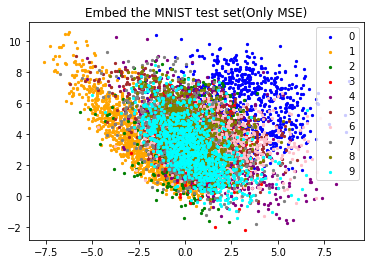

Test: 100%|██████████| 79/79 [00:00<00:00, 80.02it/s]


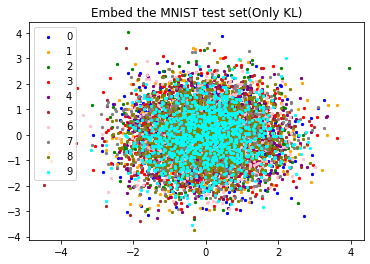

Test: 100%|██████████| 79/79 [00:01<00:00, 77.36it/s]


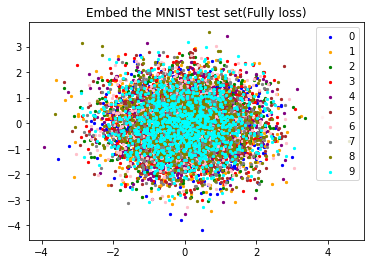

In [14]:
def data_loader():
    TrainData = datasets.MNIST(root="../data", train=True, download=True, transform=transforms.ToTensor())
    TestData = datasets.MNIST(root="../data", train=False, download=True, transform=transforms.ToTensor())
    train_dataloader = DataLoader(TrainData, batch_size=128, shuffle=True)
    test_dataloader = DataLoader(TestData, batch_size=128, shuffle=False)
    return train_dataloader, test_dataloader


def test_3_1(n_epoch, train_dataloader, test_dataloader):
    vae = VAE().to(device)
    # criterion = VAE_loss
    optimizer = optim.Adam(vae.parameters(), lr=1e-3)
    loss_epoch = []
    mse = nn.MSELoss()
    for epoch in range(n_epoch):

        # create an array to save the loss of every batch in each epoch
        for step, [x, label] in enumerate(tqdm(train_dataloader, desc='Batch')):
            # forward
            x, label = x.to(device), label.to(device)
            x_recon, mean, log_var = vae(x, label)
            MSE = mse(x_recon, x)
            KL = 0.5 * torch.sum(log_var.exp() + mean.pow(2) - 1. - log_var)
            loss = MSE
            # backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    embed = torch.tensor([]).to(device)
    labels = torch.tensor([]).to(device)
    for idx, [test_ex, test_l] in enumerate(tqdm(test_dataloader, desc='Test')):
        test_ex = test_ex.to(device)
        test_l = test_l.to(device)
        z = vae.sample_latent(test_ex, test_l)
        embed = torch.cat((embed, z), 0)
        labels = torch.cat((labels, test_l), 0)
    x_point = embed[:, :1].cpu().detach().numpy()
    y_point = embed[:, 1:].cpu().detach().numpy()
    colorList = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan"]
    labels = labels.cpu().detach().numpy()
    for i in range(10):
        indices = np.argwhere(labels == i).ravel()
        plt.scatter(x_point[indices], y_point[indices], color=colorList[i], marker="o", s=5,  label=str(i))
    plt.legend()
    plt.title("Embed the MNIST test set(Only MSE)")
    plt.show()


def test_3_2(n_epoch, train_dataloader, test_dataloader):
    vae = VAE().to(device)
    # criterion = VAE_loss
    optimizer = optim.Adam(vae.parameters(), lr=1e-3)
    loss_epoch = []
    mse = nn.MSELoss()
    for epoch in range(n_epoch):

        # create an array to save the loss of every batch in each epoch
        for step, [x, label] in enumerate(tqdm(train_dataloader, desc='Batch')):
            # forward
            x, label = x.to(device), label.to(device)
            x_recon, mean, log_var = vae(x, label)
            MSE = mse(x_recon, x)
            KL = 0.5 * torch.sum(log_var.exp() + mean.pow(2) - 1. - log_var)
            loss = KL
            # backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    embed = torch.tensor([]).to(device)
    labels = torch.tensor([]).to(device)
    for idx, [test_ex, test_l] in enumerate(tqdm(test_dataloader, desc='Test')):
        test_ex = test_ex.to(device)
        test_l = test_l.to(device)
        z = vae.sample_latent(test_ex, test_l)
        embed = torch.cat((embed, z), 0)
        labels = torch.cat((labels, test_l), 0)
    x_point = embed[:, :1].cpu().detach().numpy()
    y_point = embed[:, 1:].cpu().detach().numpy()
    colorList = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan"]
    labels = labels.cpu().detach().numpy()
    for i in range(10):
        indices = np.argwhere(labels == i).ravel()
        plt.scatter(x_point[indices], y_point[indices], color=colorList[i], marker="o", s=5,  label=str(i))
    plt.legend()
    plt.title("Embed the MNIST test set(Only KL)")
    plt.show()


def test_3_3(n_epoch, train_dataloader, test_dataloader):
    vae = VAE().to(device)
    # criterion = VAE_loss
    optimizer = optim.Adam(vae.parameters(), lr=1e-3)
    loss_epoch = []
    mse = nn.MSELoss()
    for epoch in range(n_epoch):

        # create an array to save the loss of every batch in each epoch
        for step, [x, label] in enumerate(tqdm(train_dataloader, desc='Batch')):
            # forward
            x, label = x.to(device), label.to(device)
            x_recon, mean, log_var = vae(x, label)
            MSE = mse(x_recon, x)
            KL = 0.5 * torch.sum(log_var.exp() + mean.pow(2) - 1. - log_var)
            loss = MSE + KL* 0.0001
            # backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    embed = torch.tensor([]).to(device)
    labels = torch.tensor([]).to(device)
    for idx, [test_ex, test_l] in enumerate(tqdm(test_dataloader, desc='Test')):
        test_ex = test_ex.to(device)
        test_l = test_l.to(device)
        z = vae.sample_latent(test_ex, test_l)
        embed = torch.cat((embed, z), 0)
        labels = torch.cat((labels, test_l), 0)
    x_point = embed[:, :1].cpu().detach().numpy()
    y_point = embed[:, 1:].cpu().detach().numpy()
    colorList = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan"]
    labels = labels.cpu().detach().numpy()
    for i in range(10):
        indices = np.argwhere(labels == i).ravel()
        plt.scatter(x_point[indices], y_point[indices], color=colorList[i], marker="o", s=5, label=str(i))
    plt.legend()
    plt.title("Embed the MNIST test set(Fully loss)")
    plt.show()
    

train_dataloader, test_dataloader = data_loader()
test_3_1(10, train_dataloader, test_dataloader)
test_3_2(10, train_dataloader, test_dataloader)
test_3_3(10, train_dataloader, test_dataloader)

4. short comment (1-3 sentences) on the effect of the losses on the latent space.

For a single loss, MSE Loss focuses on the reconstruction of the data, while KL Divergence affects the distribution of the data, making the z-space converge to the normal distribution we set. Its effect on the z-space is penalizing, making the model focus too much on the distribution of the data at the expense of the reconstruction ability.